# Notebook to seperate multinucleated data based on hashtags

**Created by :** Srivalli Kolla

**Created on :** 06 March, 2025

**Modified on :** 06 March, 2025

**University of Würzburg**

Env : scanpy (Python 3.12.2)

# Importing Packages

In [49]:
import scanpy as sc
import pandas as pd
import datetime
import os
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams

In [50]:
sc.settings.verbosity = 3
sc.logging.print_versions()

plt.rcParams['figure.dpi'] = 300  
plt.rcParams['savefig.dpi'] = 300
plt.vlines

timestamp = datetime.datetime.now().strftime("%d_%m_%y")

-----
anndata     0.11.3
scanpy      1.10.4
-----
Cython              3.0.12
PIL                 11.1.0
asttokens           NA
colorama            0.4.6
comm                0.2.2
cycler              0.12.1
cython              3.0.12
cython_runtime      NA
dateutil            2.9.0.post0
debugpy             1.8.12
decorator           5.2.1
executing           2.1.0
h5py                3.13.0
ipykernel           6.29.5
jedi                0.19.2
joblib              1.4.2
kiwisolver          1.4.7
legacy_api_wrap     NA
llvmlite            0.44.0
matplotlib          3.10.1
matplotlib_inline   0.1.7
mpl_toolkits        NA
natsort             8.4.0
numba               0.61.0
numpy               2.1.3
packaging           24.2
pandas              2.2.3
parso               0.8.4
patsy               1.0.1
platformdirs        4.3.6
prompt_toolkit      3.0.50
psutil              7.0.0
pure_eval           0.2.3
pydev_ipython       NA
pydevconsole        NA
pydevd              3.2.3
pydevd_file_uti

# Importing files

In [51]:
file_path = '../data/cellbender_processed_data/0.01_full/cb_0.01_full_with_hashtags_05_03_25.h5ad'
raw_adata = sc.read_h5ad(file_path)
raw_adata

AnnData object with n_obs × n_vars = 11525 × 32293
    obs: 'assigned_hashtag'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'hto_counts'

In [52]:
raw_adata.obs

,assigned_hashtag
TACCCATTCGAACGCT-1,TotalSeqB7
TACTCATCACCAGGAC-1,TotalSeqB7
GCTGCGATCCGCCAGA-1,TotalSeqB3
TGCCGTTCATGAATGC-1,TotalSeqB7
ATCGTTGAGGATCTAT-1,TotalSeqB4
...,...
GTGCGGTCAATCCGTC-1,TotalSeqB3
GCCAATATCCCCTGAC-1,TotalSeqB4
GTCCTATTCGCGAATC-1,TotalSeqB1
AGTGATCCAAAGGTTC-1,TotalSeqB6


In [53]:
raw_adata.obs['assigned_hashtag'].unique()

['TotalSeqB7', 'TotalSeqB3', 'TotalSeqB4', 'TotalSeqB5', 'TotalSeqB8', 'TotalSeqB1', 'TotalSeqB9', 'TotalSeqB6']
Categories (8, object): ['TotalSeqB1', 'TotalSeqB3', 'TotalSeqB4', 'TotalSeqB5', 'TotalSeqB6', 'TotalSeqB7', 'TotalSeqB8', 'TotalSeqB9']

In [54]:
raw_adata.var

,gene_ids,feature_types,genome
Xkr4,ENSMUSG00000051951,Gene Expression,NA
Gm1992,ENSMUSG00000089699,Gene Expression,NA
Gm19938,ENSMUSG00000102331,Gene Expression,NA
Gm37381,ENSMUSG00000102343,Gene Expression,NA
Rp1,ENSMUSG00000025900,Gene Expression,NA
...,...,...,...
TotalSeqB5,Hash5,Antibody Capture,NA
TotalSeqB6,Hash6,Antibody Capture,NA
TotalSeqB7,Hash7,Antibody Capture,NA
TotalSeqB8,Hash8,Antibody Capture,NA


# QC check

In [55]:
raw_adata.var['mt'] = raw_adata.var_names.str.startswith('mt-') 
raw_adata.var['ribo'] = raw_adata.var_names.str.startswith(("Rps","Rpl"))
raw_adata.var

,gene_ids,feature_types,genome,mt,ribo
Xkr4,ENSMUSG00000051951,Gene Expression,NA,False,False
Gm1992,ENSMUSG00000089699,Gene Expression,NA,False,False
Gm19938,ENSMUSG00000102331,Gene Expression,NA,False,False
Gm37381,ENSMUSG00000102343,Gene Expression,NA,False,False
Rp1,ENSMUSG00000025900,Gene Expression,NA,False,False
...,...,...,...,...,...
TotalSeqB5,Hash5,Antibody Capture,NA,False,False
TotalSeqB6,Hash6,Antibody Capture,NA,False,False
TotalSeqB7,Hash7,Antibody Capture,NA,False,False
TotalSeqB8,Hash8,Antibody Capture,NA,False,False


In [56]:
ribo_counts = raw_adata.var['ribo'].value_counts()

mt_counts = raw_adata.var['mt'].value_counts()

print("Counts of Ribosomal (ribo) Genes:")
print("False:", ribo_counts.get(False, 0))
print("True:", ribo_counts.get(True, 0))
print("\nCounts of Mitochondrial (mt) Genes:")
print("False:", mt_counts.get(False, 0))
print("True:", mt_counts.get(True, 0))

Counts of Ribosomal (ribo) Genes:
False: 32192
True: 101

Counts of Mitochondrial (mt) Genes:
False: 32280
True: 13


### Calculating QC metrics per cell

In [57]:
sc.pp.calculate_qc_metrics(raw_adata, qc_vars = ['mt','ribo'], percent_top = None, log1p = False, inplace = True)
raw_adata

AnnData object with n_obs × n_vars = 11525 × 32293
    obs: 'assigned_hashtag', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'hto_counts'

### Visualization of qc metrics

Text(0.5, 1.0, 'Mt and Ribo percentages - Before filtering')

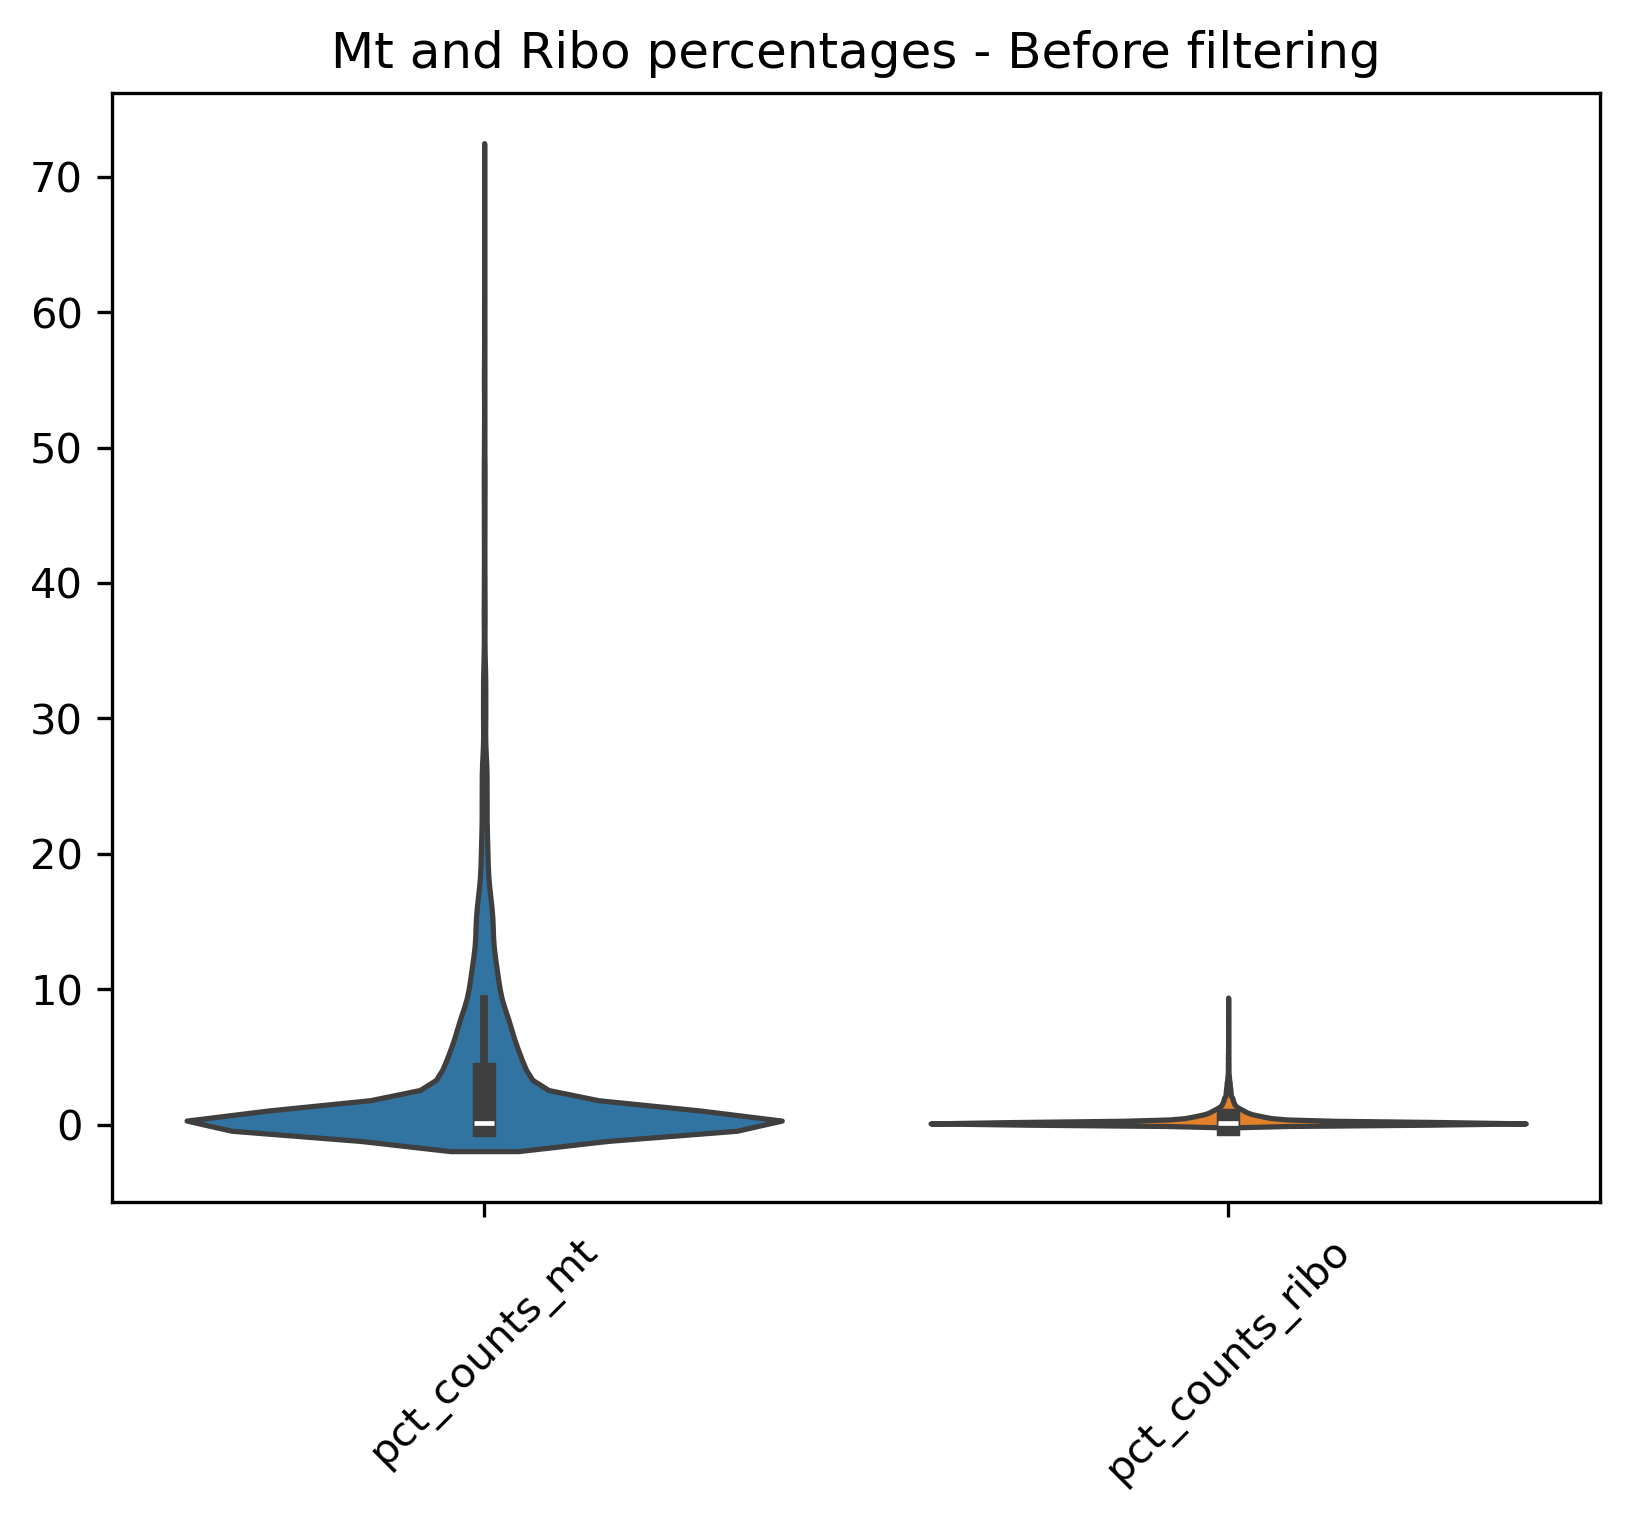

In [58]:
variables = ['pct_counts_mt', 'pct_counts_ribo']

sb.violinplot(data=raw_adata.obs[variables])
plt.xticks(rotation=45)
plt.title(f'Mt and Ribo percentages - Before filtering')

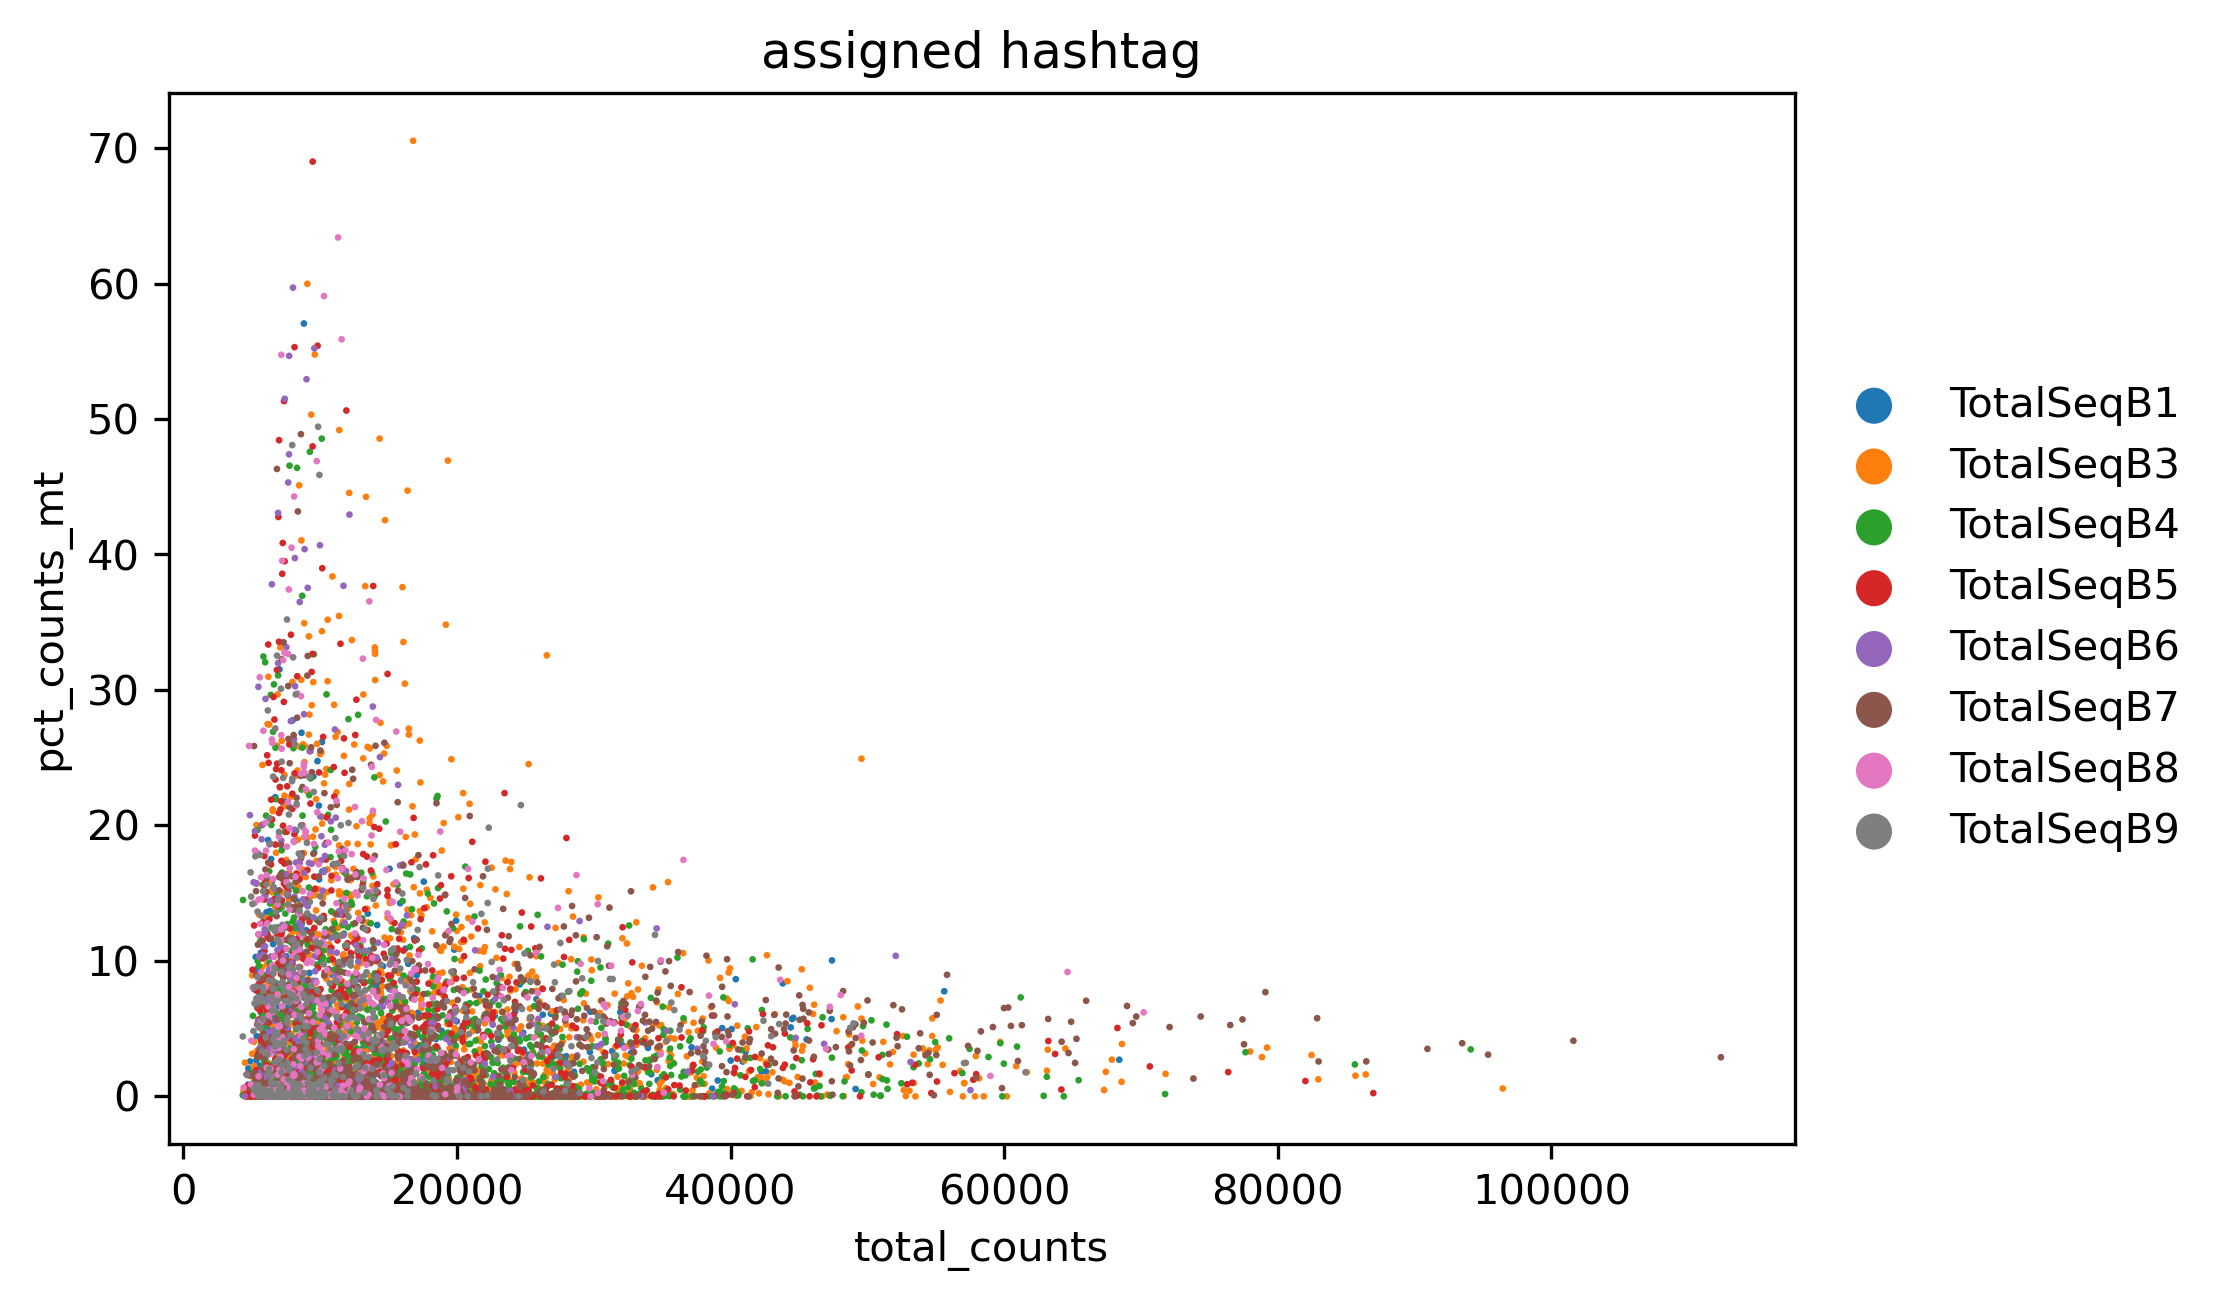

In [59]:
sc.pl.scatter(raw_adata, x = 'total_counts', y = 'pct_counts_mt', color= 'assigned_hashtag')

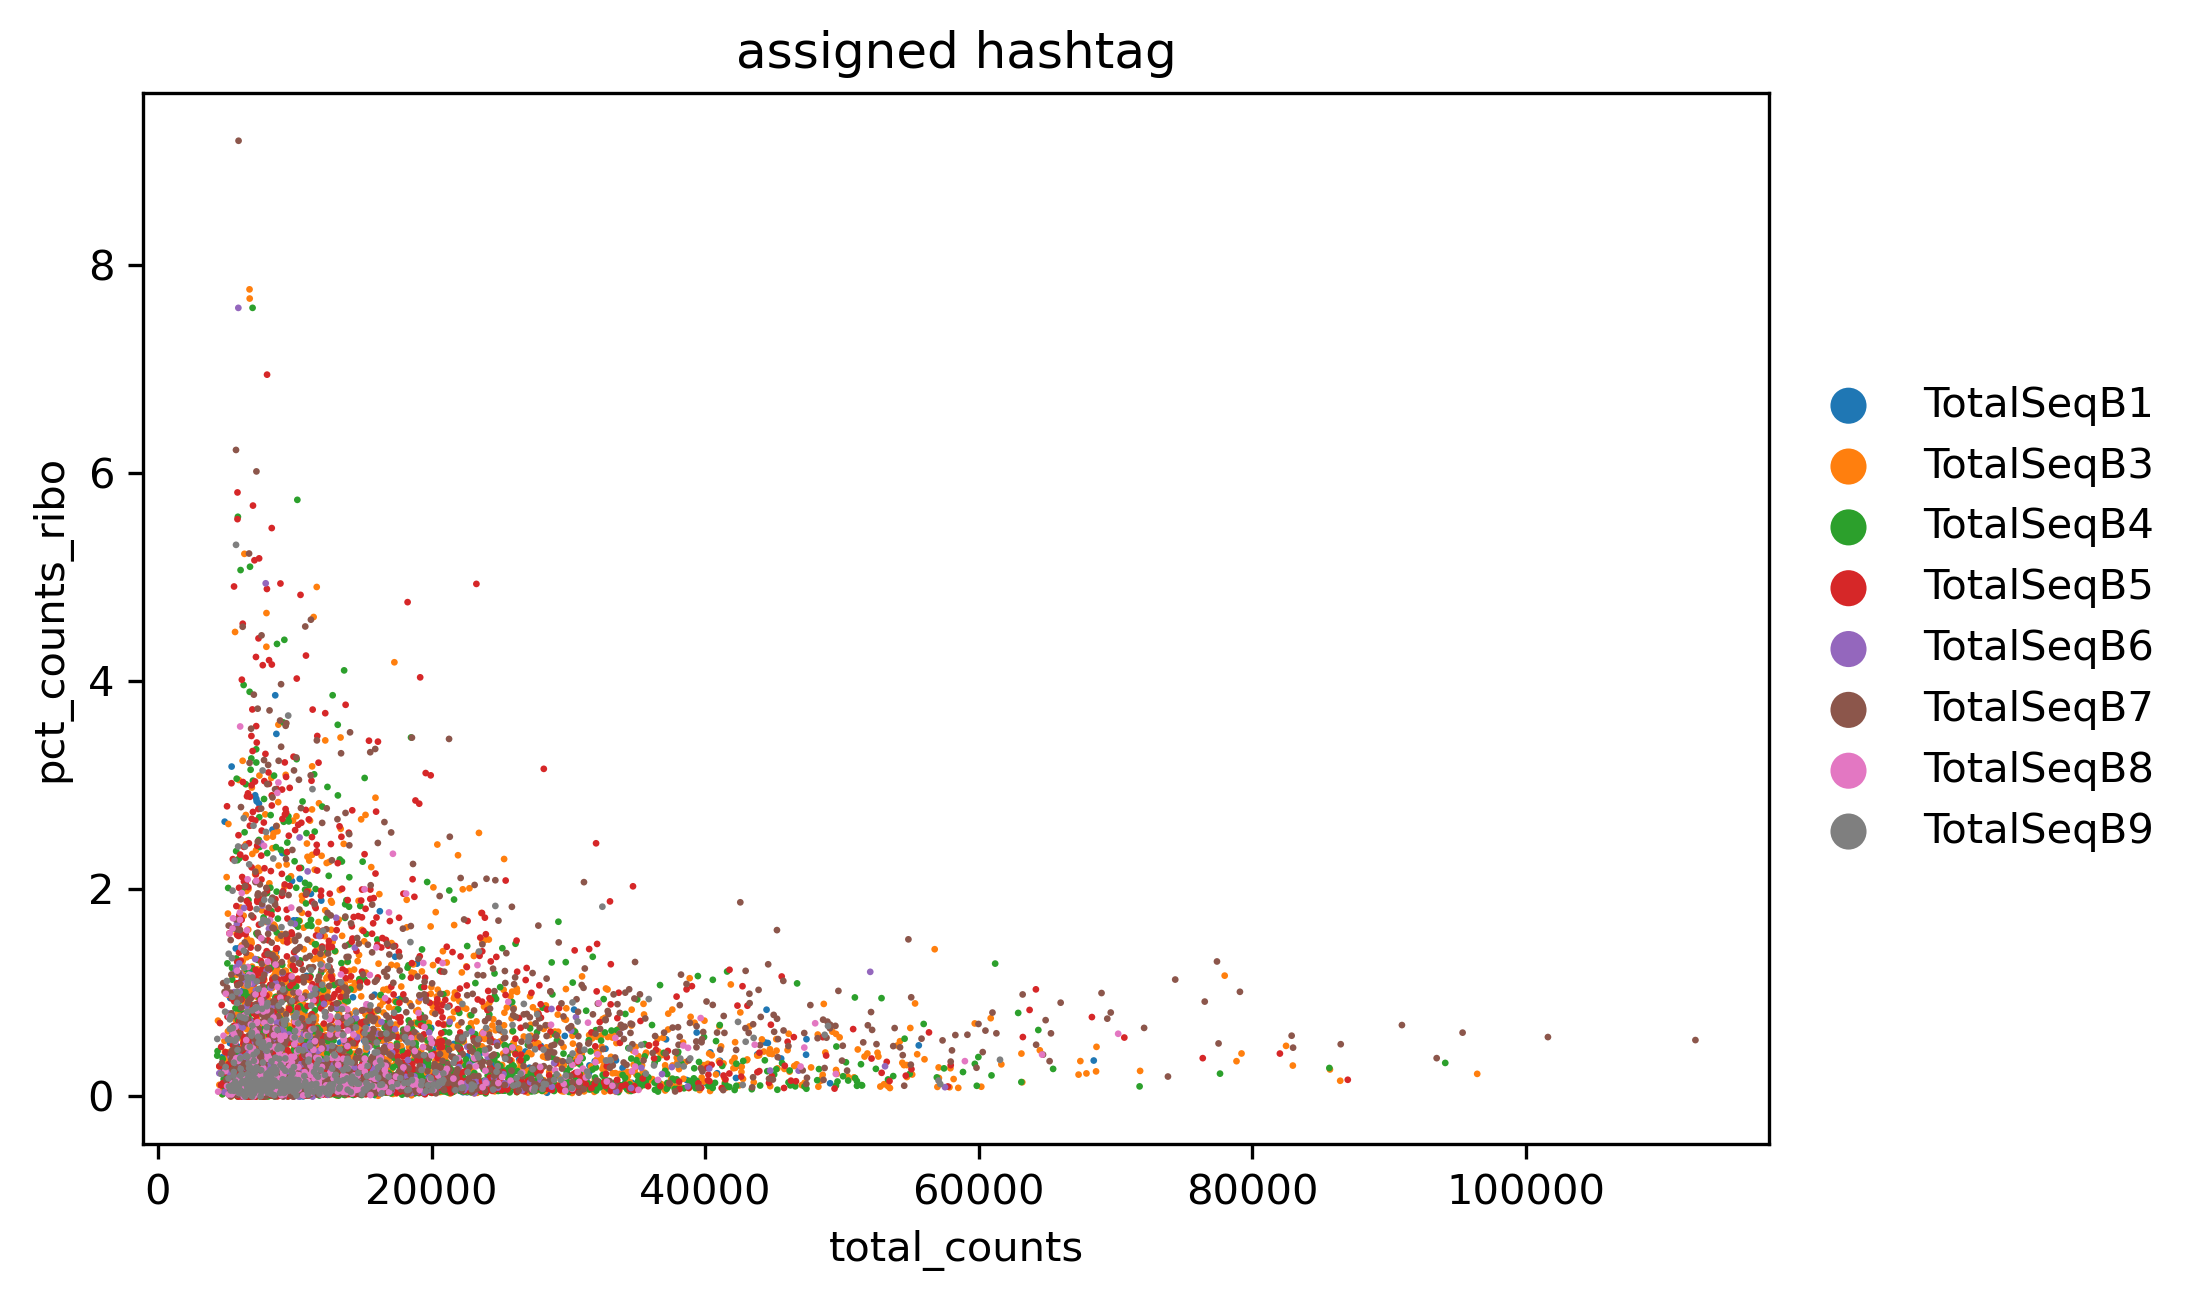

In [60]:
sc.pl.scatter(raw_adata, x = 'total_counts', y = 'pct_counts_ribo',color= 'assigned_hashtag')

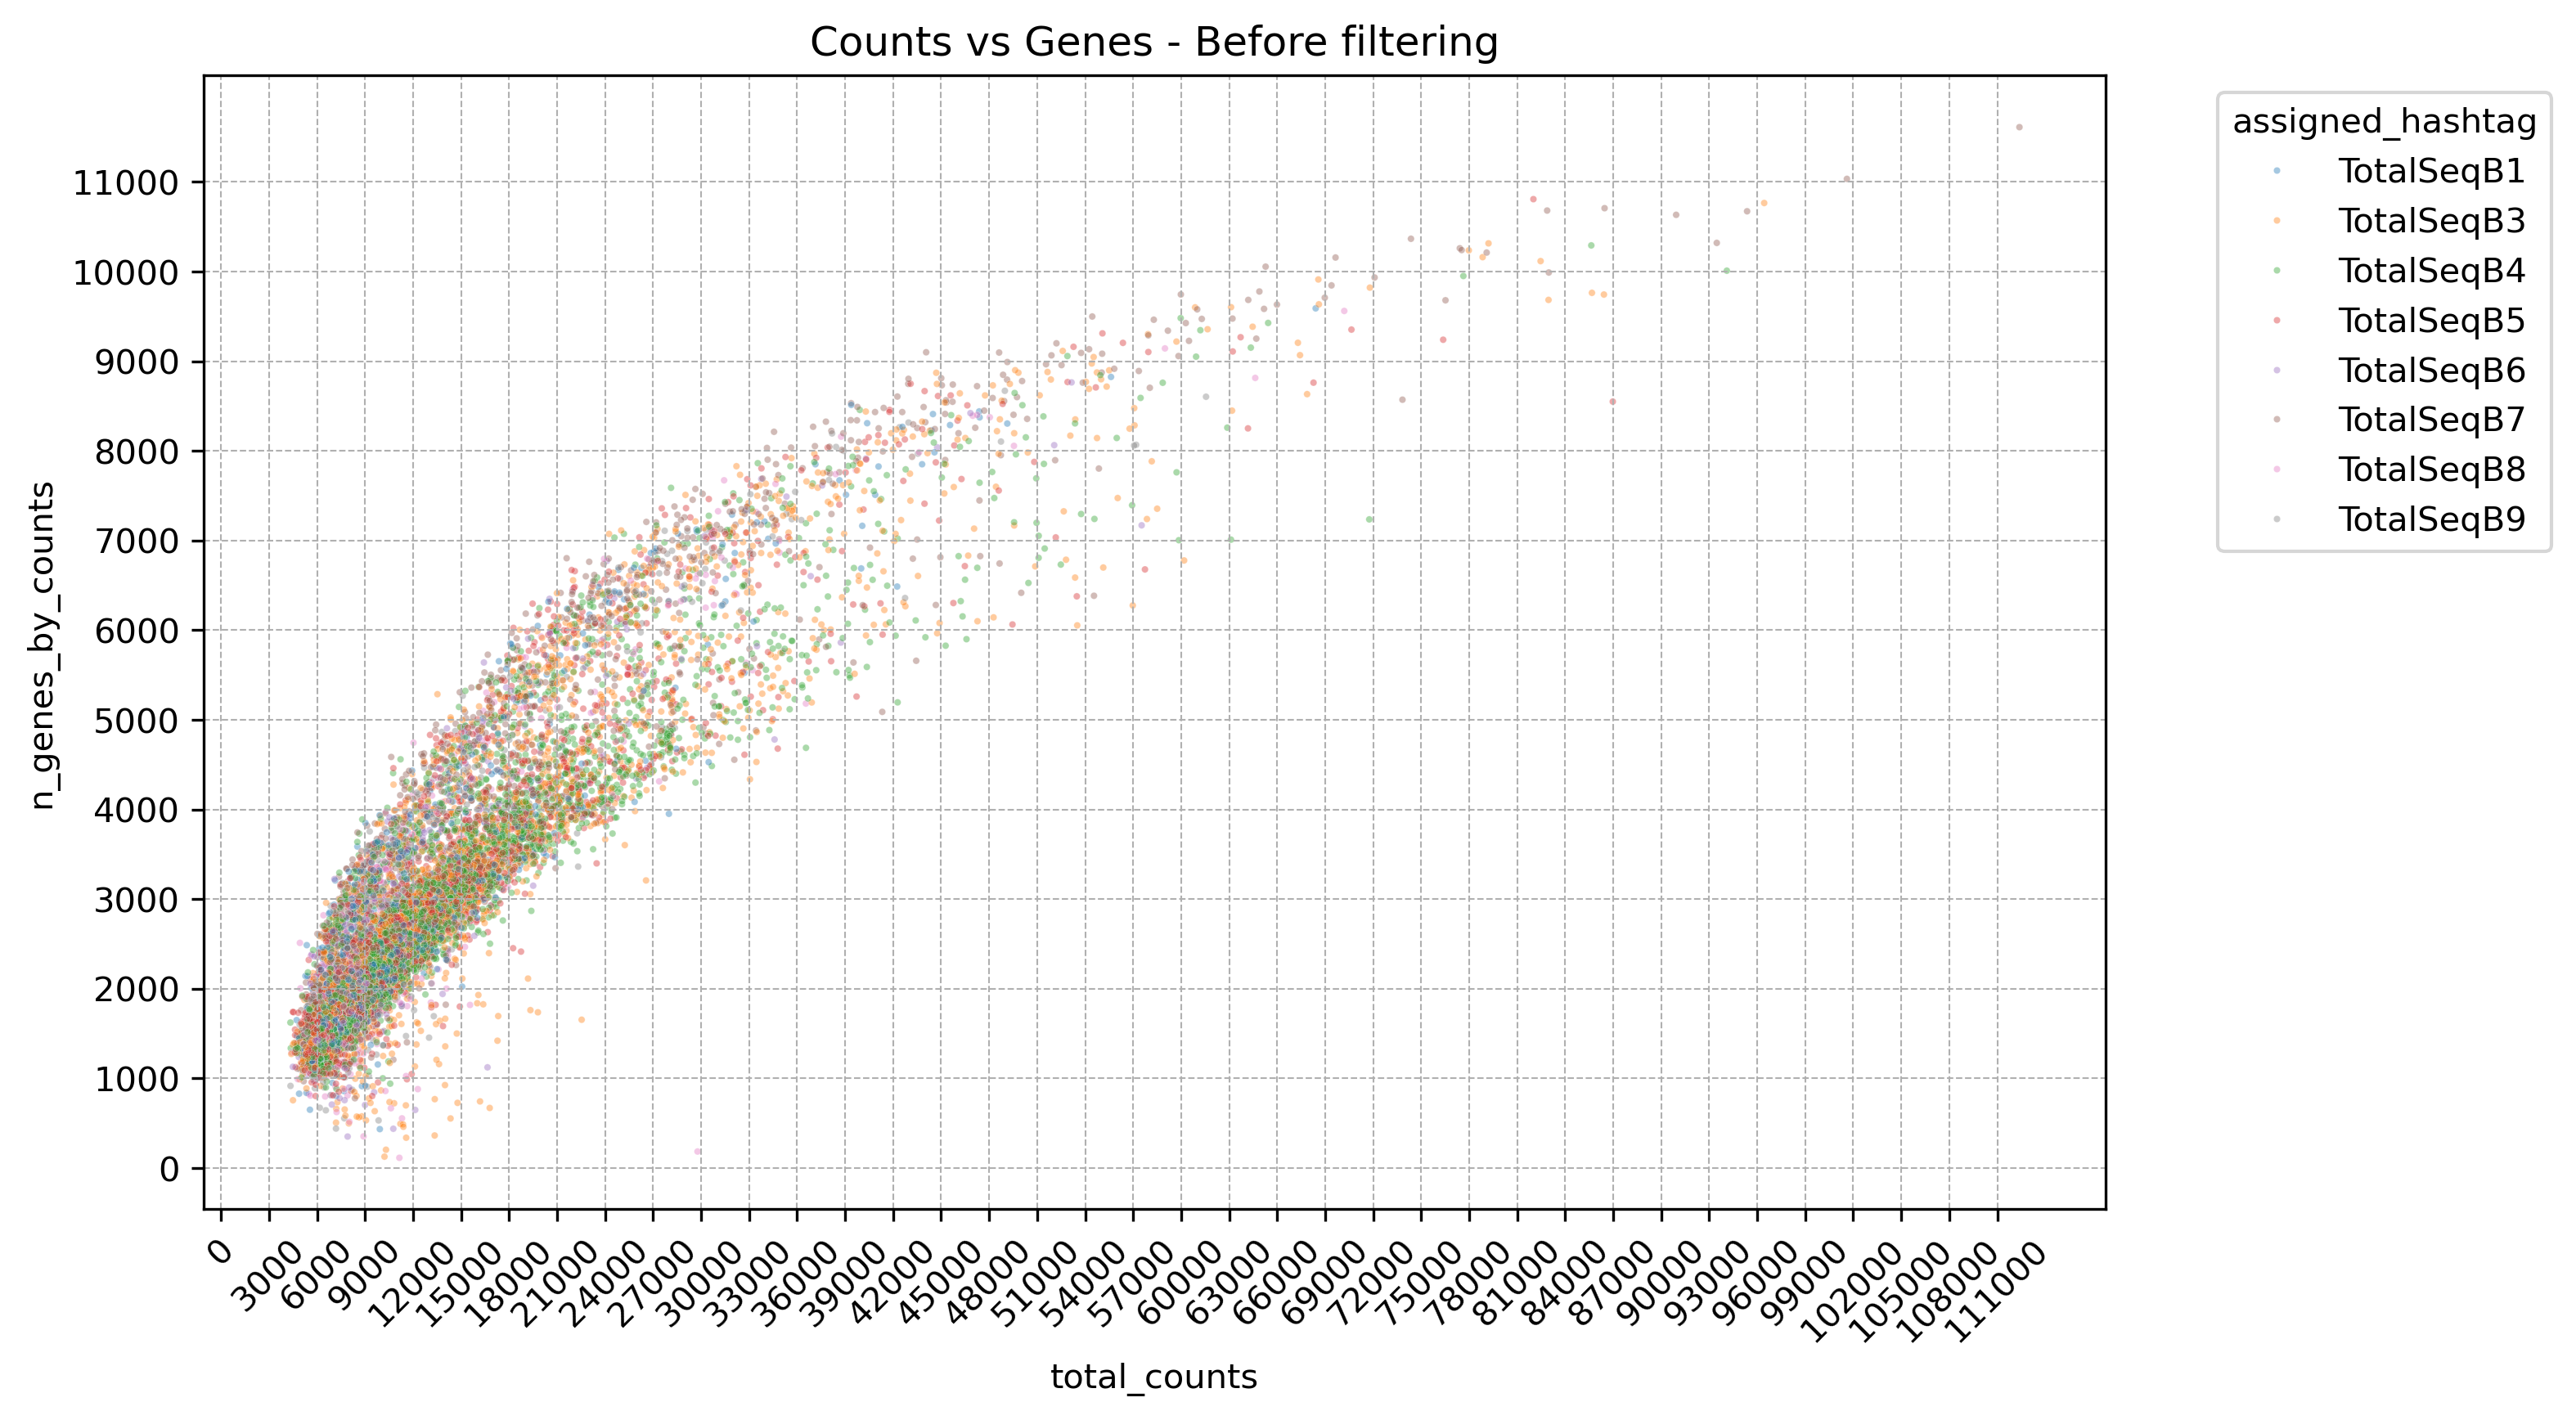

In [61]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=raw_adata.obs, x='total_counts', y='n_genes_by_counts' , hue ='assigned_hashtag', alpha = 0.4, s=4)
plt.legend(title='assigned_hashtag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(0, int(max(raw_adata.obs['total_counts'])) + 1, 3000),rotation=45, fontsize = 10)
plt.yticks(range(0, int(max(raw_adata.obs['n_genes_by_counts'])) + 1, 1000),fontsize = 10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title(f'Counts vs Genes - Before filtering')
plt.show()

### Filtering based on QC metrics

In [62]:
filtered_object = raw_adata[raw_adata.obs['pct_counts_mt'] < 20]
filtered_object = filtered_object[filtered_object.obs['pct_counts_ribo'] < 20]

filtered_object

View of AnnData object with n_obs × n_vars = 11191 × 32293
    obs: 'assigned_hashtag', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'assigned_hashtag_colors'
    obsm: 'hto_counts'

In [63]:
# View all the keys in obsm to see what is stored
print(filtered_object.obsm.keys())

# View the content of 'hto_counts' in obsm
print(filtered_object.obsm['hto_counts'])

KeysView(AxisArraysView with keys: hto_counts)
                    TotalSeqB1  TotalSeqB3  TotalSeqB4  TotalSeqB5  \
TACCCATTCGAACGCT-1           0           0         375           1   
TACTCATCACCAGGAC-1           0           0           0           0   
GCTGCGATCCGCCAGA-1           1        2366           0           0   
TGCCGTTCATGAATGC-1           1           1           0         215   
ATCGTTGAGGATCTAT-1           0           0        2628           0   
...                        ...         ...         ...         ...   
GTGCGGTCAATCCGTC-1           1           8           1           1   
GCCAATATCCCCTGAC-1           0           0          13           0   
GTCCTATTCGCGAATC-1           1           0           0           0   
AGTGATCCAAAGGTTC-1           0           0           0           0   
CCACTATTCGCTCTCA-1         652           2           0           0   

                    TotalSeqB6  TotalSeqB7  TotalSeqB8  TotalSeqB9  \
TACCCATTCGAACGCT-1           0        1546

# Hashsolo

In [64]:
# Convert hto_counts to a DataFrame
hto_df = pd.DataFrame(filtered_object.obsm['hto_counts'], index=filtered_object.obs.index)

# Add the HTO counts DataFrame as new columns in `obs`
filtered_object.obs = filtered_object.obs.join(hto_df)

# Print the first few rows of `obs` to confirm the addition
print(filtered_object.obs.head())

                   assigned_hashtag  n_genes_by_counts  total_counts  \
TACCCATTCGAACGCT-1       TotalSeqB7              11611        112387   
TACTCATCACCAGGAC-1       TotalSeqB7              11034        101605   
GCTGCGATCCGCCAGA-1       TotalSeqB3              10765         96436   
TGCCGTTCATGAATGC-1       TotalSeqB7              10673         95368   
ATCGTTGAGGATCTAT-1       TotalSeqB4              10010         94100   

                    total_counts_mt  pct_counts_mt  total_counts_ribo  \
TACCCATTCGAACGCT-1             3246       2.888234                609   
TACTCATCACCAGGAC-1             4172       4.106097                580   
GCTGCGATCCGCCAGA-1              562       0.582770                209   
TGCCGTTCATGAATGC-1             2938       3.080698                585   
ATCGTTGAGGATCTAT-1             3261       3.465462                303   

                    pct_counts_ribo  TotalSeqB1  TotalSeqB3  TotalSeqB4  \
TACCCATTCGAACGCT-1         0.541878           0      

In [68]:
print(filtered_object.obs[['TotalSeqB1', 'TotalSeqB3', 'TotalSeqB4', 'TotalSeqB5', 
                           'TotalSeqB6', 'TotalSeqB7', 'TotalSeqB8', 'TotalSeqB9']].head())

                    TotalSeqB1  TotalSeqB3  TotalSeqB4  TotalSeqB5  \
TACCCATTCGAACGCT-1           0           0         375           1   
TACTCATCACCAGGAC-1           0           0           0           0   
GCTGCGATCCGCCAGA-1           1        2366           0           0   
TGCCGTTCATGAATGC-1           1           1           0         215   
ATCGTTGAGGATCTAT-1           0           0        2628           0   

                    TotalSeqB6  TotalSeqB7  TotalSeqB8  TotalSeqB9  
TACCCATTCGAACGCT-1           0        1546           0           0  
TACTCATCACCAGGAC-1           2        1333           0           0  
GCTGCGATCCGCCAGA-1           1           1           0           0  
TGCCGTTCATGAATGC-1           1         915           0           0  
ATCGTTGAGGATCTAT-1           0           0           0           0  


In [70]:
import scanpy as sc

# Apply HashSolo doublet detection
sc.external.pp.hashsolo(
    filtered_object, 
    cell_hashing_columns=['TotalSeqB1', 'TotalSeqB3', 'TotalSeqB4', 'TotalSeqB5', 
                          'TotalSeqB6', 'TotalSeqB7', 'TotalSeqB8', 'TotalSeqB9']
)

Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2


In [71]:
filtered_object

AnnData object with n_obs × n_vars = 11191 × 32293
    obs: 'assigned_hashtag', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'TotalSeqB1', 'TotalSeqB3', 'TotalSeqB4', 'TotalSeqB5', 'TotalSeqB6', 'TotalSeqB7', 'TotalSeqB8', 'TotalSeqB9', 'Assigned_Hashtag', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'assigned_hashtag_colors'
    obsm: 'hto_counts'

In [72]:
filtered_object.obs['Classification']

TACCCATTCGAACGCT-1       Doublet
TACTCATCACCAGGAC-1    TotalSeqB7
GCTGCGATCCGCCAGA-1    TotalSeqB3
TGCCGTTCATGAATGC-1       Doublet
ATCGTTGAGGATCTAT-1    TotalSeqB4
                         ...    
GTGCGGTCAATCCGTC-1    TotalSeqB3
GCCAATATCCCCTGAC-1    TotalSeqB4
GTCCTATTCGCGAATC-1    TotalSeqB1
AGTGATCCAAAGGTTC-1    TotalSeqB6
CCACTATTCGCTCTCA-1    TotalSeqB1
Name: Classification, Length: 11191, dtype: object

In [75]:
filtered_object.obs['Assigned_Hashtag'].unique()

array([nan])